In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, image
from matplotlib import colors
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import cv2
import os

# Load images as nparray

In [2]:
working_path = 'T:/Hongwei/10-Machine thinking/DATA Hardware/2 Image sensor/Data/2021-10-13 Vision fruits'

In [3]:
os.chdir(working_path)

In [4]:
def img_reader(PATH):  
    X = []
    for path, subdir, files in os.walk(PATH):
        for file_name in glob.glob(os.path.join(path, '*.jpg')):
            data = cv2.imread(file_name).astype(np.float32)
            data = cv2.resize(data/255,(64,32))
            data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
            X.append(data)
    XX = np.array(X)
    return XX

In [5]:
def noise_data_generator(array,noise_factor):
    """
    Adds random noise to each image in the supplied array.
    """

    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0).astype(np.float32)

In [7]:
noise = 0.1

In [6]:
# load 720 images (80 images per class by 9 classes) as XX_train
XX_train = img_reader('data/train')

print(XX_train.shape)

# extend to 14400
add = np.copy(XX_train)
for i in range(19): # 720 datasets to 14400 datasets
    XX_train = np.vstack((XX_train,add)).astype(np.float32)

print(XX_train.shape)

(720, 32, 64, 3)
(14400, 32, 64, 3)


In [8]:
# add noise to XX_train as XX_train_noisy
XX_train_noisy = noise_data_generator(array = XX_train,noise_factor = noise)
print(XX_train_noisy.shape)

(14400, 32, 64, 3)


In [148]:
# 720 datasets
YY_train = []
for i in range (9):
    Y_train = np.tile(XX_train[80*i], (80,1,1,1))
    YY_train.append(Y_train)
YY_train = np.array(YY_train).reshape(720,32,64,3)
print(YY_train.shape)

# 7200 datases
YY_train = np.tile(YY_train,(20,1,1,1))
print(YY_train.shape)

(720, 32, 64, 3)
(14400, 32, 64, 3)


In [12]:
# 90 images as XX_validate (10 images per class by 9 classes)
XX_validate = img_reader('data/validation')

print(XX_validate.shape)

# extend to 1800 with noise
add = np.copy(XX_validate)
for i in range(19): 
    XX_validate = np.vstack((XX_validate,add)).astype(np.float32)
    
print(XX_validate.shape)

(90, 32, 64, 3)
(1800, 32, 64, 3)


In [13]:
# add noise
XX_validate_noisy = noise_data_generator(array = XX_validate,noise_factor = noise)    
print(XX_validate.shape)

(1800, 32, 64, 3)


In [150]:
# 90 datases
YY_validate = []
for i in range (9):
    Y_validate = np.tile(XX_validate[10*i], (10,1,1,1))
    YY_validate.append(Y_validate)
YY_validate = np.array(YY_validate).reshape(90,32,64,3)
print(YY_validate.shape)

# 900 datases
YY_validate = np.tile(YY_validate,(20,1,1,1))
print(YY_validate.shape)

(90, 32, 64, 3)
(1800, 32, 64, 3)


In [15]:
# 90 images as XX_test
XX_test = img_reader('data/test')

print(XX_test.shape)

# extend to 1800 with noise
add = np.copy(XX_test)
for i in range(19): 
    XX_test = np.vstack((XX_test,add)).astype(np.float32)
    
print(XX_test.shape)

(90, 32, 64, 3)
(1800, 32, 64, 3)


In [16]:
#add noise
XX_test_noisy = noise_data_generator(array = XX_test,noise_factor = noise)   
print(XX_test.shape)

(1800, 32, 64, 3)


In [151]:
# 90 datases
YY_test = []
for i in range (9):
    Y_test = np.tile(XX_test[10*i], (10,1,1,1))
    YY_test.append(Y_test)
YY_test = np.array(YY_test).reshape(90,32,64,3)
print(YY_test.shape)

# 900 datases
YY_test = np.tile(YY_test,(20,1,1,1))
print(YY_test.shape)

(90, 32, 64, 3)
(1800, 32, 64, 3)


# Convolutional autoencoder (CAE)

In [19]:
#import keras
#from keras import layers
from tensorflow import keras
from tensorflow.keras import layers

In [212]:
XX_train_noisy[0].shape

(32, 64, 3)

In [21]:
input_img = keras.Input(shape=XX_train_noisy[0].shape)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D( 8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

#x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 8, 8) i.e. 128-dimensional

#x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
#x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D( 8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
output_img = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x) # sigmoid is better than softmax

# AUTOENCODER

In [22]:
autoencoder = keras.Model(input_img, output_img)
opt = keras.optimizers.Adam(learning_rate = 0.005)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')

In [23]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 16, 16)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 16, 8)          1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 8, 8)           0     

In [24]:
history = autoencoder.fit(x = XX_train_noisy,
                          y = XX_train,
                          epochs=100,
                          batch_size=200,
                          shuffle=True,
                          validation_data=(XX_validate_noisy,XX_validate)
                         )

Epoch 1/100
72/72 [==============================] - 37s 505ms/step - loss: 0.6064 - val_loss: 0.5896
Epoch 2/100
72/72 [==============================] - 42s 589ms/step - loss: 0.5845 - val_loss: 0.5833
Epoch 3/100
72/72 [==============================] - 41s 576ms/step - loss: 0.5817 - val_loss: 0.5831
Epoch 4/100
72/72 [==============================] - 42s 584ms/step - loss: 0.5794 - val_loss: 0.5807
Epoch 5/100
72/72 [==============================] - 43s 602ms/step - loss: 0.5783 - val_loss: 0.5796
Epoch 6/100
72/72 [==============================] - 43s 596ms/step - loss: 0.5777 - val_loss: 0.5809
Epoch 7/100
72/72 [==============================] - 42s 577ms/step - loss: 0.5772 - val_loss: 0.5810
Epoch 8/100
72/72 [==============================] - 43s 598ms/step - loss: 0.5765 - val_loss: 0.5783
Epoch 9/100
72/72 [==============================] - 42s 581ms/step - loss: 0.5761 - val_loss: 0.5780
Epoch 10/100
72/72 [==============================] - 42s 587ms/step - loss: 0.575

72/72 [==============================] - 115s 2s/step - loss: 0.5707 - val_loss: 0.5746
Epoch 81/100
72/72 [==============================] - 113s 2s/step - loss: 0.5708 - val_loss: 0.5740
Epoch 82/100
72/72 [==============================] - 113s 2s/step - loss: 0.5708 - val_loss: 0.5751
Epoch 83/100
72/72 [==============================] - 122s 2s/step - loss: 0.5708 - val_loss: 0.5739
Epoch 84/100
72/72 [==============================] - 112s 2s/step - loss: 0.5709 - val_loss: 0.5738
Epoch 85/100
72/72 [==============================] - 116s 2s/step - loss: 0.5707 - val_loss: 0.5744
Epoch 86/100
72/72 [==============================] - 131s 2s/step - loss: 0.5720 - val_loss: 0.5745
Epoch 87/100
72/72 [==============================] - 124s 2s/step - loss: 0.5716 - val_loss: 0.5737
Epoch 88/100
72/72 [==============================] - 126s 2s/step - loss: 0.5705 - val_loss: 0.5736
Epoch 89/100
72/72 [==============================] - 126s 2s/step - loss: 0.5706 - val_loss: 0.5736
Epo

In [48]:
# save autoencoder
autoencoder.save('CAE/Noisy/autoencoder.h5')
autoencoder.save_weights('CAE/Noisy/autoencoder weights.h5')

# Autoencoder test

In [49]:
from tensorflow.keras.models import load_model
autoencoder = load_model('CAE/Noisy/autoencoder.h5')

In [50]:
titles = ['apple','banana','blueberry','cherry_tomato','kiwi','orange','pear','persimmon','raspberry']

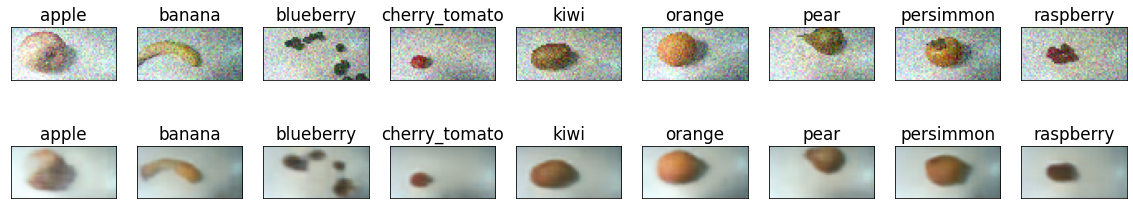

In [270]:
AE_out = autoencoder.predict(XX_test_noisy)

n = 9
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(XX_test_noisy[(i-1)*10])
    plt.title(titles[i-1])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow( AE_out[(i-1)*10] )
    plt.title(titles[i-1])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.savefig('CAE/Noisy/autoencoder_IO.png')
plt.show()

In [214]:
AE_out.max()

0.9997159


# ENCODER

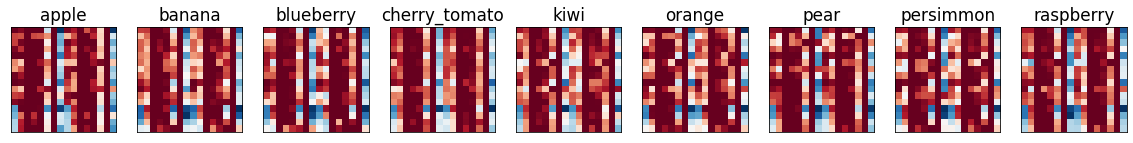

In [271]:
# encoder test
encoder = keras.Model(input_img, encoded)
encoded_img = encoder.predict(XX_test_noisy) # features

n = 9 # number of picture to show in a row
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_img[(i-1)*10].reshape((16,16)),cmap = 'RdBu')
    plt.title(titles[i-1])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.savefig('CAE/Noisy/features 256 Dim.png')    
plt.show()

In [216]:
encoded_img.shape

(1800, 4, 8, 8)

In [217]:
encoded_img.max()

1.318965

# DECODER

In [218]:
# placeholder for an encoded input
encoded_input = keras.Input(shape = encoded_img[0].shape)

In [219]:
# later layers of the autoencoder model
decoder_layer = autoencoder.layers[-7](encoded_input)
decoder_layer = autoencoder.layers[-6](decoder_layer)
decoder_layer = autoencoder.layers[-5](decoder_layer)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

In [220]:
# decoder
decoder = keras.Model(encoded_input, decoder_layer)

In [221]:
decoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4, 8, 8)]         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 8, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 16, 8)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 16, 16)         1168      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 32, 32)        4640      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 32, 64, 32)        0   

In [222]:
# save encoder
encoder.save('CAE/Noisy/autoencoder_encoder.h5')
encoder.save_weights('CAE/Noisy/autoencoder_encoder weights.h5')

In [223]:
# save decoder
decoder.save('CAE/Noisy/autoencoder_decoder.h5')
decoder.save_weights('CAE/Noisy/autoencoder_decoder weights.h5')

# TEST

In [224]:
autoencoder_encoder = keras.models.load_model('CAE/Noisy/autoencoder_encoder.h5')
autoencoder_decoder = keras.models.load_model('CAE/Noisy/autoencoder_decoder.h5')

In [225]:
autoencoder_encoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 16, 16)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 16, 8)          1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 8, 8)           0   

In [226]:
autoencoder_decoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4, 8, 8)]         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 8, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 16, 8)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 16, 16)         1168      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 32, 32)        4640      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 32, 64, 32)        0   

In [227]:
features = autoencoder_encoder(XX_test_noisy)

In [228]:
codec_out = autoencoder_decoder.predict(features)

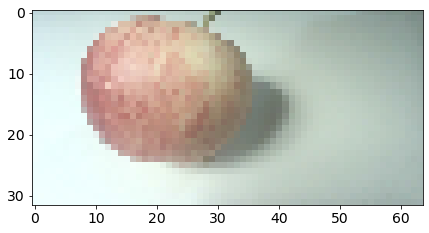

In [229]:
plt.imshow(XX_test[4])

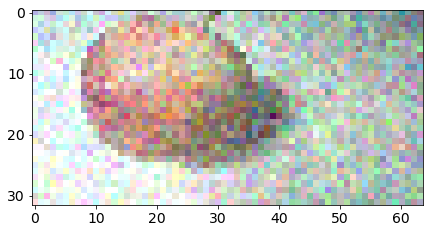

In [230]:
plt.imshow(XX_test_noisy[4])

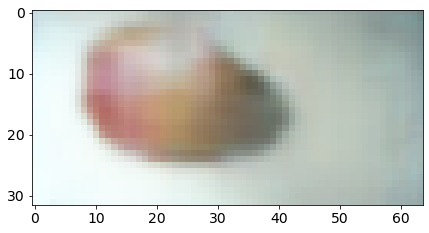

In [231]:
plt.imshow(AE_out[4]) # output of autoencoder

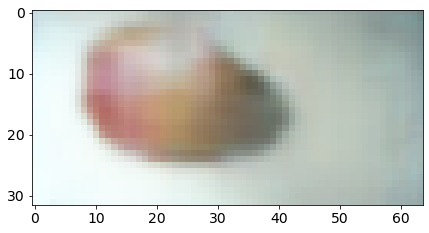

In [232]:
plt.imshow(codec_out[4]) # output of autoencoder_encoder & autoencoder_decoder

## SAVE and LOAD autoencoder test results 'AE_out' as ndarray

In [263]:
np.save('CAE/Noisy/AE_out/AE_out.npy',AE_out)  # save ndarray with (1800,32,64,3) dimensions

In [264]:
AE_out = np.load('CAE/Noisy/AE_out/AE_out.npy') # load saved AE_out ndarray

## SAVE 90 test results as figures

In [233]:
XX_test_noisy.shape

(1800, 32, 64, 3)

In [235]:
AE_out.shape

(1800, 32, 64, 3)

In [255]:
type(AE_out[0])

numpy.ndarray

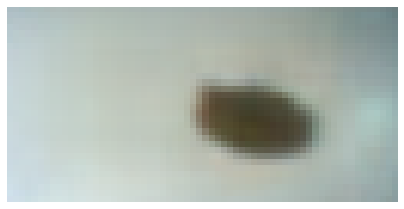

In [253]:
for i in range(90):
    plt.imshow(AE_out[i])
    plt.axis('off')
    plt.savefig(f'CAE/Noisy/AE_out/{i+1}.jpg')

# Classifier results

## Load classifier to classify the AE_out

In [238]:
classifier = keras.models.load_model('Classifier - save 2 params less than dataset/FRUITS CLASSIFIER.h5')

In [239]:
classifier.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 64, 3)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 64, 16)        448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 32, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 16, 16)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 16, 8)          1160      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 8, 8)           0   

Y_pred

In [240]:
output_class = classifier.predict(AE_out)

In [241]:
y_pred = output_class

In [244]:
Y_pred = np.zeros_like(y_pred,dtype=int)
Y_pred[np.arange(len(y_pred)), y_pred.argmax(1)] = 1

Y_true

In [245]:
def YY_generate(YY,data_num_per_class,class_num,repeat_number):
    YY_train = []
    for i in range (class_num):
        Y_train = np.tile(YY[i], (data_num_per_class,1))
        YY_train.append(Y_train)
    YY_train = np.array(YY_train)
    YY_train = np.vstack((YY_train[0],YY_train[1],YY_train[2],YY_train[3],YY_train[4],YY_train[5],
                          YY_train[6],YY_train[7],YY_train[8]))
    
    YY_train = np.tile(YY_train,(repeat_number,1))
    
    return YY_train

In [246]:
YY = np.eye(9, dtype=int)
YY_test = YY_generate(YY,data_num_per_class = 10,class_num = 9,repeat_number = 20)

In [247]:
Y_true = YY_test

In [248]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

labels = titles
print(labels)

YY_TRUE=[]
YY_PRED=[]
for i in range(0,len(Y_true)):
    Y_TRUE = np.argmax(Y_true[i])
    Y_PRED = np.argmax(y_pred[i])
    
    YY_TRUE.append(Y_TRUE)
    YY_PRED.append(Y_PRED)

['apple', 'banana', 'blueberry', 'cherry_tomato', 'kiwi', 'orange', 'pear', 'persimmon', 'raspberry']


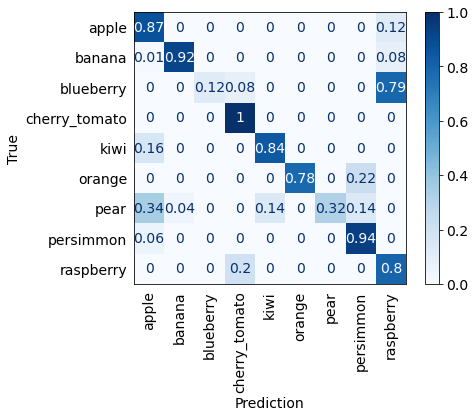

In [272]:
cm = confusion_matrix(YY_TRUE, YY_PRED, normalize='true')
#np.savetxt('Classifier/Confusion_matrix.csv', cm, delimiter=',')

cm=np.around(cm,2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues,xticks_rotation = 90)
disp.im_.set_clim(0, 1)

#plt.rcParams.update({'font.size': 12})  # all font size besides 'fontsize'
#plt.title('Confusion matrix')

plt.rcParams.update({'font.size': 14})
plt.tick_params(left=False,bottom=False)

plt.xlabel('Prediction')
plt.ylabel('True')

plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.right'] = True

plt.savefig('CAE/Noisy/AE_out classification.png',dpi = 300, bbox_inches='tight')
plt.show()

In [267]:
sum = 0
for j in range(9):
    sum = sum + cm[j][j]
ave = np.round(sum/9,2)
print(f'Average accuracy is {ave}')

Average accuracy is 0.73
